In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [7]:
data=pd.read_csv("Simple Linear Regression Dataset.csv")

In [8]:
data.head()

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556


In [9]:
data.tail()

,X,Y
295,296,200.555556
296,297,201.222222
297,298,201.888889
298,299,1.888889
299,300,1.888889


In [10]:
data.drop([298,299], axis=0, inplace=True)

In [11]:
data.tail()

,X,Y
293,294,199.222222
294,295,199.888889
295,296,200.555556
296,297,201.222222
297,298,201.888889


In [12]:
x=data[["X"]]
y=data["Y"]

[]

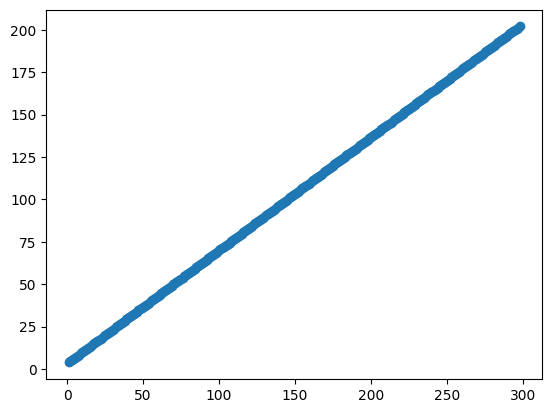

In [13]:
plt.scatter(x,y)
plt.plot()

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [15]:
LR_model=LinearRegression()
LR_model.fit(x_train,y_train)

LinearRegression()

In [16]:
LR_model.score(x_train,y_train)

1.0

In [17]:
LR_model.score(x_test,y_test)

1.0

In [18]:
data2=pd.read_csv("multi linear regression_House_Rent_Dataset.csv")

In [19]:
data2.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [42]:
data2.corr()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
BHK,1.000000,0.369718,0.716145,-0.153225,0.046914,-0.140264,0.041534,0.794885
Rent,0.369718,1.000000,0.413551,-0.214867,0.210525,-0.146251,0.006027,0.441215
Size,0.716145,0.413551,1.000000,-0.079705,-0.049831,-0.172783,0.031500,0.740703
Area Type,-0.153225,-0.214867,-0.079705,1.000000,-0.282856,0.056276,0.155388,-0.183012
City,0.046914,0.210525,-0.049831,-0.282856,1.000000,0.002633,0.041769,0.108257
Furnishing Status,-0.140264,-0.146251,-0.172783,0.056276,0.002633,1.000000,-0.092878,-0.181425
Tenant Preferred,0.041534,0.006027,0.031500,0.155388,0.041769,-0.092878,1.000000,0.056894
Bathroom,0.794885,0.441215,0.740703,-0.183012,0.108257,-0.181425,0.056894,1.000000


In [20]:
data2.drop(["Posted On","Floor","Area Type","Area Locality","Point of Contact"],axis=1,inplace=True)

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [22]:
#data2["Area Type"].replace({"Super Area":0,"Carpet Area":1,"Built Area":2},inplace=True)

In [23]:
data2['City']=le.fit_transform(data2["City"])
data2['Furnishing Status']=le.fit_transform(data2["Furnishing Status"])
data2['Tenant Preferred']=le.fit_transform(data2["Tenant Preferred"])
data2['Area Type']=le.fit_transform(data2["Area Type"])

In [24]:
data2.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,2,4,2,1,2
1,2,20000,800,2,4,1,1,1
2,2,17000,1000,2,4,1,1,1
3,2,10000,800,2,4,2,1,1
4,2,7500,850,1,4,2,0,1


In [25]:
X=data2[['BHK','Size','Area Type','City','Furnishing Status','Tenant Preferred','Bathroom']]
y=data2[['Rent']]

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()

In [27]:
X_scaled=scaler.fit_transform(X)
y_scaled=scaler.fit_transform(y)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [29]:
model3=LinearRegression().fit(X_train,y_train)

In [30]:
y_pred_scaled=model3.predict(X_test)

In [31]:
y_pred=scaler.inverse_transform(y_pred_scaled)
y_test_original=scaler.inverse_transform(y_test)
y_train_original=scaler.inverse_transform(y_train)
X_test_original=scaler.inverse_transform(X_test)

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test_original, y_pred)
rmse = mean_squared_error(y_test_original, y_pred, squared=False)
mae = mean_absolute_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("Mean Absolute Error: ", mae)
print("R-squared: ", r2)

Mean Squared Error:  1.360928536886894e+19
Root Mean Squared Error:  3689076492.6833572
Mean Absolute Error:  1906286958.1581383
R-squared:  0.4401346743379895


In [33]:
# train score without taking inverse transform
model3.score(X_train,y_train)  # train score

0.23515418607006

In [34]:
# testing score before taking inverse transform
model3.score(X_test,y_test)   # Test Score

0.4401346743379895

## Bias Varience

In [35]:
bias = np.mean((y_test_original - y_pred)**2)
variance = np.mean((y_pred - np.mean(y_pred))**2)
print(bias,variance)

1.360928536886894e+19 9.245256833634255e+18


In [36]:
train_accuracy=model3.score(X_train,y_train)
test_accuracy=model3.score(X_test,y_test)

In [37]:
if train_accuracy < test_accuracy and bias < variance:
    print("Model is underfitting")
elif train_accuracy > test_accuracy and bias > variance:
    print("Model is overfitting")
else:
    print("Model is well-fit")

Model is well-fit


## Gradient Descent

In [38]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(loss='squared_error', learning_rate='constant', eta0=0.01, max_iter=100, random_state=42)


sgd.fit(X_train, y_train_original.flatten())
test_score = sgd.score(X_test, y_test_original.flatten())

## Polynomial

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)


X_poly = poly.fit_transform(X)
y_poly = poly.fit_transform(y)


X_train_poly,X_test_poly,y_train,y_test=train_test_split(X_poly,y_poly,test_size=0.2,random_state=42)

model3.fit(X_train_poly, y_train)

y_train_pred_poly = model3.predict(X_train_poly)
y_test_pred_poly = model3.predict(X_test_poly)


r2_train_poly = r2_score(y_train, y_train_pred_poly)
r2_test_poly = r2_score(y_test, y_test_pred_poly)
print("Polynomial Model Training R-squared:", r2_train_poly)
print("Polynomial Model Testing R-squared:", r2_test_poly)


Polynomial Model Training R-squared: 0.3823227675472362
Polynomial Model Testing R-squared: -2.3443691397162816


## Learning Curve

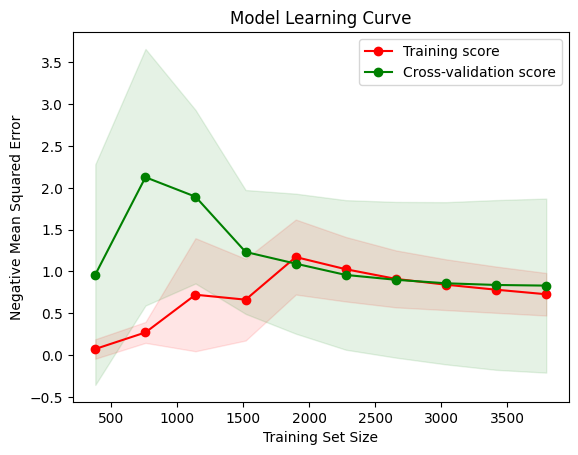

In [40]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(model3, X_scaled, y_scaled, cv=5, scoring='neg_mean_squared_error',train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = -np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)


plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,
                 alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std,
                 alpha=0.1, color="g")
plt.title('Model Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Negative Mean Squared Error')
plt.legend(loc='best')
plt.show()
